## 1.2.1 Пример
<p>Необходимо разработать виртуальную модель процесса обучения. В программе должны быть объекты-ученики, учитель, кладезь знаний.</p>
<p>Потребуется три класса – "учитель", "ученик", "данные". Учитель и ученик во многом похожи, оба – люди. Значит, их классы могут принадлежать одному надклассу "человек". Однако в контексте данной задачи у учителя и ученика вряд ли найдутся общие атрибуты. Определим, что должны уметь объекты для решения задачи "увеличить знания":</p>
<ul>
    <li>Ученик должен уметь брать информацию и превращать ее в свои знания.</li>
    <li>Учитель должен уметь учить группу учеников.</li>
    <li>Данные могут представлять собой список знаний. Элементы будут извлекаться по индексу.</li>
</ul>

In [2]:
class Data:
    def __init__(self, *info):
        self.info = list(info)
    def __getitem__(self, i):
        return self.info[i]
    
class Teacher:
    def teach(self, info, *pupil):
        for i in pupil:
            i.take(info)

class Pupil:
    def __init__(self):
        self.knowledge = []
    def take(self, info):
        self.knowledge.append(info)
        
lesson = Data('class', 'object', 'inheritance', 'polymorphism', 'encapsulation')
marIvanna = Teacher()
vasy = Pupil()
pety = Pupil()
marIvanna.teach(lesson[2], vasy, pety)
marIvanna.teach(lesson[0], pety)
print(vasy.knowledge)
print(pety.knowledge)

['inheritance']
['inheritance', 'class']


## 1.2.2 Пример
Напишите программу по следующему описанию. Есть класс "Воин". От него создаются два экземпляра-юнита. Каждому устанавливается здоровье в 100 очков. В случайном порядке они бьют друг друга. Тот, кто бьет, здоровья не теряет. У того, кого бьют, оно уменьшается на 20 очков от одного удара. После каждого удара надо выводить сообщение, какой юнит атаковал, и сколько у противника осталось здоровья. Как только у кого-то заканчивается ресурс здоровья, программа завершается сообщением о том, кто одержал победу.

In [3]:
import random
class Warrior:
    def __init__(self, health):
        self.health = health
    
    def hit(self, target, target1):
        if target.health > 0:
            target.health -= 20
        if target1 == warrior1:
            target1 = 'Warrior1'
        if target1 == warrior2:
            target1 = 'Warrior2'
        print(target1, ' has attacked')
        print(target.health, ' left')
        if target.health == 0:
            print(target1, ' has won')
            
warrior1 = Warrior(100)
warrior2 = Warrior(100)
q = int(input('Enter 1 to attack. Enter 2 to stop program:'))

while q != 2:
    if q == 1:
        j = random.randint(1, 2)
        if j % 2 == 0:
            warrior1.hit(warrior2, warrior1)
            q = int(input('Enter 1 to let some warrior attack:'))
        else:
            warrior2.hit(warrior1, warrior2)
            q = int(input('Enter 1 to let some warrior attack:'))
    else:
        print('Wrong input.')
        break

Enter 1 to attack. Enter 2 to stop program:1
Warrior2  has attacked
80  left
Enter 1 to let some warrior attack:1
Warrior1  has attacked
80  left
Enter 1 to let some warrior attack:2


## 1.2.3 Пример
Создайте класс по работе с дробями. В классе должна быть реализована следующая функциональность:
<ul>
    <li>сложение дробей;</li>
    <li>вычитание дробей;</li>
    <li>умножение дробей;</li>
    <li>деление дробей.</li>
</ul>

In [4]:
class Rational:
    
    @staticmethod
    def gcd(a, b):
        while (b != 0):
            a, b = b, a % b
        return a
    
    @staticmethod
    def sgn(x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        else:
            return 0
        
    def __init__(self, n, d):
        if n == 0:
            self.num = 0
            self.den = 1
        else:
            z = self.sgn(n) * self.sgn(d)
            n = abs(n)
            d = abs(d)
            k = self.gcd(n, d)
            self.num = z * n // k
            self.den = d // k
    
    def __str__(self):
        if self.num == 0:
            return '0'
        else:
            return str(self.num) + '/' + str(self.den)
    
    def __add__(self, o):
        n1 = self.num
        d1 = self.den
        if type(o) == int:
            n2 = o
            d2 = 1
        else:
            n2 = o.num
            d2 = o.den
        n = n1 * d2 + n2 * d1
        d = d1 * d2
        return Rational(n, d)
    
    def __radd__(self, o):
        n1 = self.num
        d1 = self.num
        if type(o) == int:
            n2 = o
            d2 = 1
        else:
            n2 = o.num
            d2 = o.den
        n = n1 * d2 + n2 * d1
        d = d1 * d2
        return Rational(n, d)
    
    def __sub__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * d2 - n2 * d1
        d = d1 * d2
        return Rational(n, d)
    
    def __mul__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * n2
        d = d1 * d2
        return Rational(n, d)
    
    def __floordiv__(self, o):
        n1 = self.num
        d1 = self.den
        n2 = o.num
        d2 = o.den
        n = n1 * d2
        d = d1 * n2
        return Rational(n, d)
    

d1 = Rational(1, 2)
d2 = Rational(1, 3)
d3 = d1 + d2
print(d3)
d4 = d1 - d2
print(d4)
d5 = d1 * d2
print(d5)
d6 = d1 * d2
print(d6)
d7 = d1 // d2
print(d7)
d8 = 6 + d1
print(d8)

5/6
1/6
1/6
1/6
3/2
7/1


## Задание
Создайте класс по работе с тригонометрическими функциями. В классе должны быть реализованы функции вычисления:
<ul>
    <li>косинуса;</li>
    <li>синуса;</li>
    <li>тангенса;</li>
    <li>арксинуса;</li>
    <li>арккосинуса;</li>
    <li>арктангенса;</li>
    <li>перевода из градусов в радианы.</li>
</ul>

In [18]:
import numpy as np
class trigonom:
    def sin(self, x):
        return np.sin(x)
    def cos(self, x):
        return np.cos(x)
    def tg(self, x):
        return np.tan(x)
    def arcsin(self, x):
        if -1 <= x <= 1:
            return np.arcsin(x)
        else:
            return "Ошибка"
    def arccos(self, x):
        if -1 <= x <= 1:
            return np.arccos(x)
        else:
            return "Ошибка"
    def arctg(self, x):
        return np.arctan(x)
    def deg_to_rad(self, x):
        return x * np.pi / 180

t = trigonom()
print(t.cos(0.5))
print(t.sin(90))
print(t.tg(0.5))
print(t.arcsin(0.5))
print(t.arccos(0.5))
print(t.arctg(0.5))
print(t.deg_to_rad(90))

0.8775825618903728
0.8939966636005579
0.5463024898437905
0.5235987755982989
1.0471975511965979
0.4636476090008061
1.5707963267948966


## 1.2.1 Пример
Определите класс бинарного дерева и задайте его объекты с отдельным атрибутом для каждого из потомков.

In [ ]:
class Tree:
    def __init__(self, left, right):
        self.left = left
        self.right = right
        
t = Tree(Tree('a', 'b'), Tree('c', 'd'))
t.right.left

## 1.2.2 Пример
<p>Для обозначения отсутствующих потомков можно использовать None (в случае если у узла только один потомок). Само собой, можно комбинировать разные методы (например, использовать списки или множества потомков для каждого узла).</p><br>
<p>Распространенный способ реализации деревьев, особенно на языках, не имеющих встроенной поддержки списков, это так называемое представление «первый потомок, следующий брат». В нем каждый узел имеет два «указателя» или атрибута, указывающих на другие узлы, как в бинарном дереве. Однако, первый из этих атрибутов ссылается на первого потомка узла, а второй — на его следующего брата (т.е. узел, имеющий того же родителя, но находящийся правее, — прим. перев). Иными словами, каждый узел дерева имеет указатель на связанный список его потомков, а каждый из этих потомков ссылается на свой собственный аналогичный список. Таким образом, небольшая модификация бинарного дерева даст нам многопутевое дерево, показанное в листинге ниже.</p>

In [ ]:
class Tree:
    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next
        
t = Tree(Tree('a', Tree('b', Tree('c', Tree('d')))))
t.kids.next.next.val

## Задание
Представьте дерево показанное на рисунке с использованием списка из списков. Выведите на печать корень дерева, а также его левое и правое поддеревья.
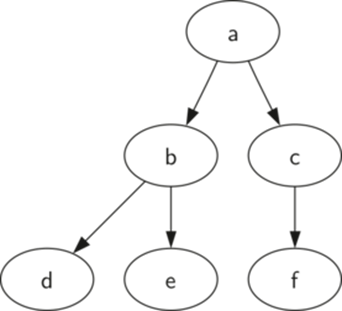

In [7]:
class Tree:
    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next
        
t = Tree(Tree('a', Tree('b', Tree('d', 'e'))), Tree('c', Tree('f')))

print('root = ', t.kids.val)

print('left subtree = ', end='')
print(t.kids.next.val, end=', ')
print(t.kids.next.next.val, end=', ')
print(t.kids.next.next.next)

print('right subtree = ', end='')
print(t.next.kids, end=', ')
print(t.next.next.kids)

root =  a
left subtree = b, d, e
right subtree = c, f


## Задание
Дан класс, описывающий бинарное дерево.

<pre><b>class Tree:</b>
   <b>def __init__(self, data):</b>
      <b>self.left = None</b>
      <b>self.right = None</b>
      <b>self.data = data</b>
   <b>def PrintTree(self):</b>
      <b>print(self.data)</b></pre>
      
Реализуйте в классе функцию для вставки нового элемента в дерево по следующим правилам:
<ul>
    <li>Левое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.</li>
    <li>Правое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.</li>
    <li>Каждое из левого и правого поддеревьев также должно быть бинарным деревом поиска.</li>
    <li>Не должно быть повторяющихся узлов.</li><br>
</ul>
<p>Метод вставки сравнивает значение узла с родительским узлом и решает куда доваить элемент (в левое или правое поддерево). Перепишите, метод PrintTree для печати полной версии дерева.</p>

In [6]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
    
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data)
        if self.right:
            self.right.PrintTree()
    
    def AddItem(self, item):
        if self.data:
            if item < self.data:
                if self.left is None:
                    self.left = Tree(item)
                else:
                    self.left.AddItem(item)
            elif item > self.data:
                if self.right is None:
                    self.right = Tree(item)
                else:
                    self.right.AddItem(item)
        else:
            self.data = item

            
tree = Tree(5)

tree.AddItem(1)
tree.AddItem(2)

tree.AddItem(6)
tree.AddItem(7)

tree.PrintTree()

1
2
5
6
7


## 1.3.1 Пример
Построим дерево решений для задачи классификации, для этого, построим границу решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Импортируем библиотеки, набор данных и посмотрим его характеристики.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset('iris')
dataset
dataset.shape
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Далее, разделим наши данные на атрибуты и метки, а затем выделим в общей совокупности полученных данных обучающие и тестовые наборы. Таким образом, мы можем обучить наш алгоритм на одном наборе данных, а затем протестировать его на совершенно на другом наборе, который алгоритм еще не видел. Это дает вам более точное представление о том, как на самом деле будет работать ваш обученный алгоритм.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    dataset.iloc[:, :-1],
    dataset.iloc[:, -1],
    test_size = 0.20
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.head()
y_train.head()

50     versicolor
70     versicolor
126     virginica
113     virginica
93     versicolor
Name: species, dtype: object

После того, как данные были разделены на обучающие и тестовые наборы, последний шаг состоит в том, чтобы обучить алгоритм дерева решений на этих данных и сделать прогнозы. Scikit-Learn содержит библиотеку tree , которая содержит встроенные классы/методы для различных алгоритмов дерева решений. Поскольку мы собираемся выполнить здесь задачу классификации, мы будем использовать класс DecisionTreeClassifier для этого примера. Метод fit этого класса вызывается для обучения алгоритма на обучающих данных, которые передаются в качестве параметра методу fit . Выполним следующий сценарий для обучения алгоритма.

[Text(0.3076923076923077, 0.9166666666666666, 'x[3] <= 0.7\ngini = 0.666\nsamples = 120\nvalue = [38, 43, 39]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'x[2] <= 4.75\ngini = 0.499\nsamples = 82\nvalue = [0, 43, 39]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.6153846153846154, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.172\nsamples = 42\nvalue = [0, 4, 38]'),
 Text(0.38461538461538464, 0.4166666666666667, 'x[0] <= 6.2\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.25, 'x[2] <= 5.05\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.384

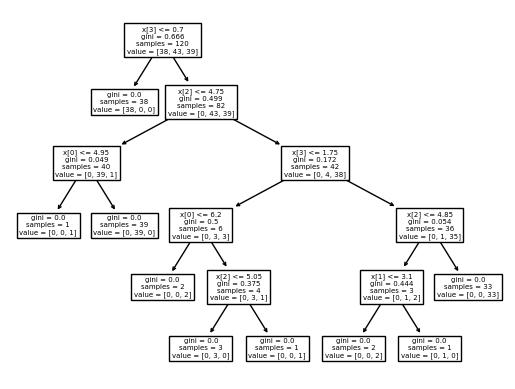

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

from sklearn import tree
tree.plot_tree(classifier)

Теперь, когда наш классификатор обучен, давайте сделаем прогнозы по тестовым данным. Для составления прогнозов используется метод predict класса Decision Tree Classifier. Взгляните на следующий код для использования.

In [10]:
y_pred = classifier.predict(x_test)
y_pred

array(['virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor'], dtype=object)

На данный момент мы обучили наш алгоритм и сделали некоторые прогнозы. Теперь посмотрим, насколько точен наш алгоритм. Для задач классификации обычно используются такие метрики, как матрица путаницы, точность. Библиотека Scikit-Learn metrics содержит методы classification_report и confusion_matrix, которые могут быть использованы для расчета этих метрик.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  5  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.71      0.83         7
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



Из матрицы оценок алгоритма вы можете видеть, что из 30 тестовых экземпляров наш алгоритм неправильно классифицировал только 3. Это приблизительно 91 % точности.

## Задание
Постройте классификатор на основе дерева принятия решений следующего датасета:
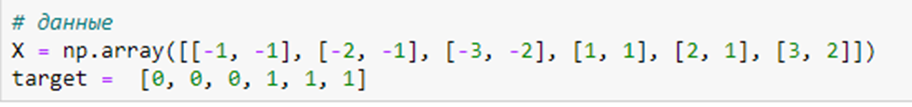

[[0 0 0]
 [1 0 0]
 [0 0 1]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



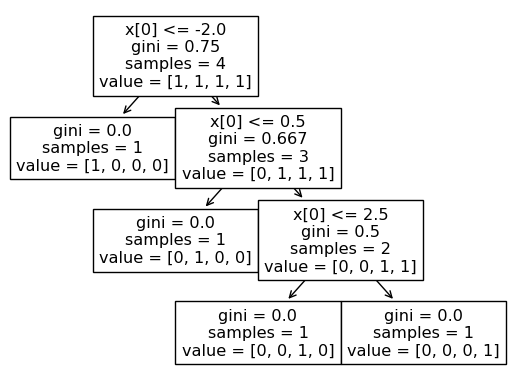

In [12]:
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

dataset = pd.DataFrame(data=x)
dataset
dataset.shape
dataset.head()

x_train, x_test, y_train, y_test = train_test_split(
    dataset.iloc[:, :-1],
    dataset.iloc[:, -1],
    test_size=0.20
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.head()
y_train.head()

classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)

tree.plot_tree(classifier)

y_pred = classifier.predict(x_test)
y_pred

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

## 1.4.1 Пример
Постойте регрессию с использованием дерева решений, реализованного в Python.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)


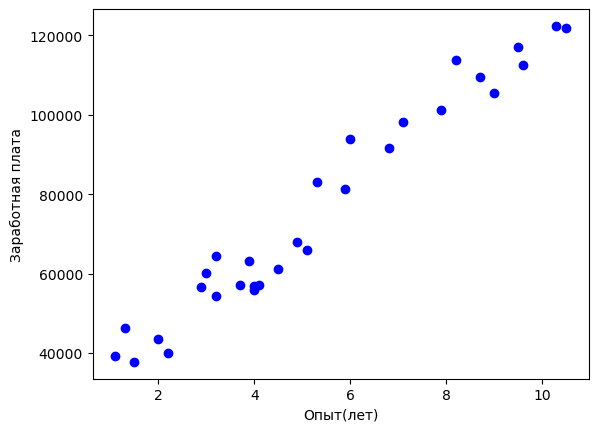

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
Mean Squared Error: 25498988.416666668
Mean Absolute Error: 4120.666666666667


5.421715809463662

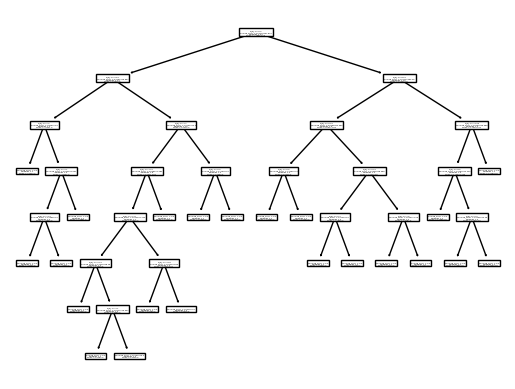

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
print(dataset.head())

print(dataset.shape)
dataset.describe()

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label='Заработная плата')
plt.xlabel('Опыт(лет)')
plt.ylabel('Заработная плата')
plt.show()

from sklearn.tree import DecisionTreeRegressor
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

from sklearn import tree
tree.plot_tree(regressor)

y_pred = regressor.predict(x_test)
y_pred

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

Средняя абсолютная ошибка для нашего алгоритма составляет 4120.66, что составляет менее 6 процентов от среднего значения всех значений в столбце.

## Задание
Постройте модель регрессии для данных из предыдущей рабочей тетради.Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv
Постройте прогноз. Оцените точность модели.

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
(48, 5)


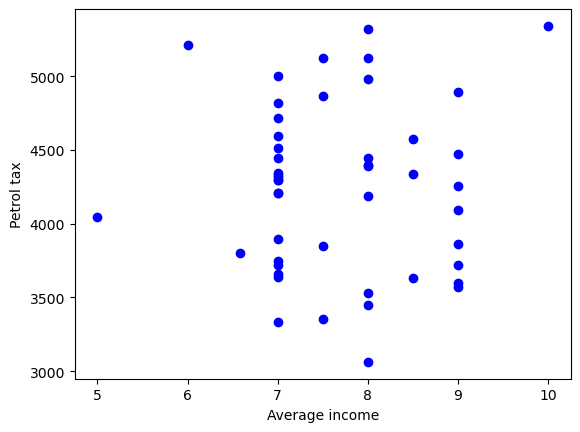

[[9.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01]
 [9.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01]
 [9.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01]
 [7.5000e+00 4.8700e+03 2.3510e+03 5.2900e-01]
 [8.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01]
 [1.0000e+01 5.3420e+03 1.3330e+03 5.7100e-01]
 [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [8.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01]
 [7.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [7.5000e+00 5.1260e+03 1.4186e+04 5.2500e-01]
 [7.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01]
 [7.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [7.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01]
 [7.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01]
 [7.0000e+00 3.7180e+03 4.7250e+03 5.4000e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [8.5000e+00 4.3410e+03 6.0100e+03 6.7700e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 

9.414484377821925

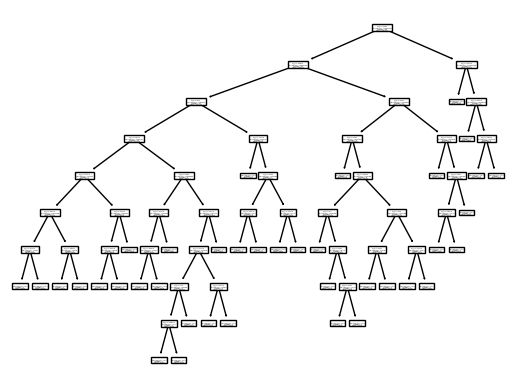

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataset = pd.read_csv(url)
print(dataset.head())

print(dataset.shape)
dataset.describe()

plt.scatter(dataset['Petrol_tax'], dataset['Average_income'], color='b', label='Average income')
plt.xlabel('Average income')
plt.ylabel('Petrol tax')
plt.show()

from sklearn.tree import DecisionTreeRegressor
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

from sklearn import tree
tree.plot_tree(regressor)

y_pred = regressor.predict(x_test)
y_pred

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100